# Data Science z Python 3.10. Identyfikacja klas zdjęć z fast.ai v2 i budowa aplikacji
## 🇬🇧 Data Science with Python 3.10. Classification of images using fast.ai v2 and application
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek
#### 🇬🇧 Import libraries 

In [ ]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 5.1 MB/s 
     |████████████████████████████████| 4.2 MB 56.2 MB/s 
     |████████████████████████████████| 197 kB 75.5 MB/s 
     |████████████████████████████████| 1.2 MB 44.8 MB/s 
     |████████████████████████████████| 346 kB 73.7 MB/s 
     |████████████████████████████████| 59 kB 8.9 MB/s 
     |████████████████████████████████| 212 kB 71.3 MB/s 
     |████████████████████████████████| 86 kB 6.8 MB/s 
     |████████████████████████████████| 86 kB 7.4 MB/s 
     |████████████████████████████████| 1.1 MB 52.0 MB/s 
     |████████████████████████████████| 140 kB 78.8 MB/s 
     |████████████████████████████████| 596 kB 70.2 MB/s 
     |████████████████████████████████| 127 kB 76.3 MB/s 
     |████████████████████████████████| 271 kB 72.6 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dataset_x1')
path = Path('/content/drive/My Drive/dataset_x1')

Mounted at /content/drive


### 2. Brakuje danych treningowych?
#### 🇬🇧 Lack of data?

... zawsze możemy w tym celu skorzystać z zasobów Internetu i pobrać dane z Internetu. Uważaj jednak na słowa, które wpisujesz - w końcu pobierasz automatycznie dane z Internetu i nie chcesz mieć na swoim dysku Google dziwnych rzeczy ;)

... we can always download data from the Internet. However, be careful with the keywords that you type - you are going to automatically download data from the Internet and you don't want to have strange things on your Google Drive ;)

In [ ]:
klasy = 'class_1', 'class_2' 
path = Path('treningowe') 
if not path.exists(): 
  path.mkdir()
  for o in klasy:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} keyword', max_images=4) 
    download_images(dest, urls=urls)

### 3. Trenowanie modelu
#### 🇬🇧 Model training

In [ ]:
classes = ['class_1', 'class_2']

In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), 
    batch_tfms=aug_transforms(max_rotate=2.0)
)
dls = data.dataloaders(path, bs = 32, num_workers = 0)


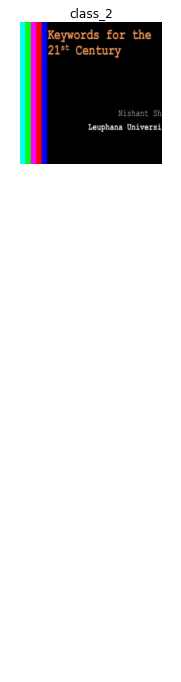

In [ ]:
dls.valid.show_batch(max_n=12, nrows=4)

In [ ]:
learn = vision_learner(dls, alexnet, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,nan,0.468045,1.000000,00:00
1,nan,0.468045,1.000000,00:00


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
learn.export(fname='model.pkl')